# TfidfVectorizer Explanation
Convert a collection of raw documents to a matrix of TF-IDF features

TF-IDF where TF means term frequency, and IDF means Inverse Document frequency.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ['Hello Priyanka sahu here, I love machine learning','Welcome to the Machine learning hub' ]

In [2]:
vect = TfidfVectorizer()

In [3]:
vect.fit(text)

TfidfVectorizer()

In [4]:
## TF will count the frequency of word in each document. and IDF 
print(vect.idf_)

[1.40546511 1.40546511 1.40546511 1.         1.40546511 1.
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511]


In [5]:
print(vect.vocabulary_)

{'hello': 0, 'priyanka': 6, 'sahu': 7, 'here': 1, 'love': 4, 'machine': 5, 'learning': 3, 'welcome': 10, 'to': 9, 'the': 8, 'hub': 2}


### A words which is present in all the data, it will have low IDF value. With this unique words will be highlighted using the Max IDF values.

In [6]:
example = text[0]
example

'Hello Priyanka sahu here, I love machine learning'

In [7]:
example = vect.transform([example])
print(example.toarray())

[[0.4078241  0.4078241  0.         0.29017021 0.4078241  0.29017021
  0.4078241  0.4078241  0.         0.         0.        ]]


### Here, 0 is present in the which indexed word, which is not available in given sentence.

## PassiveAggressiveClassifier

### Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

## Let's start the work

In [8]:
import pandas as pd

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
dataframe.shape

(6363, 4)

In [13]:
dataframe.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [14]:
dataframe.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6363 entries, 0 to 6362
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6363 non-null   int64 
 1   title       6363 non-null   object
 2   text        6363 non-null   object
 3   label       6363 non-null   object
dtypes: int64(1), object(3)
memory usage: 199.0+ KB


In [16]:
dataframe.describe()

,Unnamed: 0
count,6363.000000
mean,5276.233380
std,3032.462827
min,2.000000
25%,2691.500000
50%,5248.000000
75%,7890.500000
max,10557.000000


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6363 entries, 0 to 6362
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6363 non-null   int64 
 1   title       6363 non-null   object
 2   text        6363 non-null   object
 3   label       6363 non-null   object
dtypes: int64(1), object(3)
memory usage: 199.0+ KB


In [18]:
dataframe['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [19]:
dataframe['label'].value_counts()

REAL    3199
FAKE    3164
Name: label, dtype: int64

In [20]:
dataframe['text'].unique()

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [21]:
dataframe['title'].unique()

array(['You Can Smell Hillary’s Fear',
       'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)',
       'Kerry to go to Paris in gesture of sympathy', ...,
       'Anti-Trump Protesters Are Tools of the Oligarchy     : Information',
       'In Ethiopia, Obama seeks progress on peace, security in East Africa',
       'Gowrav Self intro'], dtype=object)

In [22]:
dataframe.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

There is no missing value

In [23]:
dataframe.value_counts('label')

label
REAL    3199
FAKE    3164
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

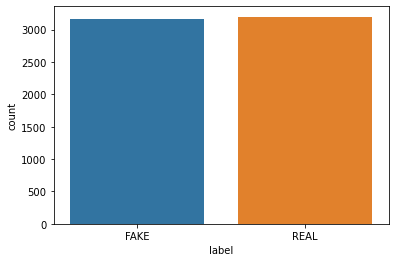

In [24]:
sns.countplot(data=dataframe, x='label')

##  X & Y

In [25]:
x = dataframe['text']
y = dataframe['label']

In [26]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6358    Hi there! I am Gowrav, you might also know me ...
6359    Hi there! I am Gowrav, you might also know me ...
6360    Hi there! I am Gowrav, you might also know me ...
6361    Hi there! I am Gowrav, you might also know me ...
6362    Hi there! I am Gowrav, you might also know me ...
Name: text, Length: 6363, dtype: object

In [27]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6358    REAL
6359    REAL
6360    REAL
6361    REAL
6362    REAL
Name: label, Length: 6363, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

##  Train_Test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

322     FAKE
1391    FAKE
276     REAL
6225    FAKE
3629    REAL
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5090, dtype: object

In [30]:
y_train

322     FAKE
1391    FAKE
276     REAL
6225    FAKE
3629    REAL
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5090, dtype: object

In [31]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

* max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
* max_df = 25 means "ignore terms that appear in more than 25 documents".

In [32]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [33]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.11%


In [34]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[590  35]
 [ 40 608]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       625
        REAL       0.95      0.94      0.94       648

    accuracy                           0.94      1273
   macro avg       0.94      0.94      0.94      1273
weighted avg       0.94      0.94      0.94      1273



## Final result

In [36]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [37]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [38]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [39]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [40]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [41]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [42]:
fake_news_det1("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [43]:
fake_news_det1("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [44]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']


In [45]:
fake_news_det1('''4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me as Gowrav Krishna Boyapati. I've been coding for over 3 year now as a Full Stack developer and Python Devloper. I have developed many python projects based on AI and ML like face-mask detector, social distance detector, speed detection using Webcam and lot more.",REAL''')

['REAL']


# DecisionTree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier()

In [48]:
model.fit(tfid_x_train, y_train)

DecisionTreeClassifier()

In [49]:
base_pred = model.predict(tfid_x_test)

In [50]:
pred_train = model.predict(tfid_x_train)

In [51]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [52]:
accuracy_score(y_train,pred_train)

1.0

In [53]:
accuracy_score(y_test,base_pred)

0.8256087981146897

C:\Users\RD\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


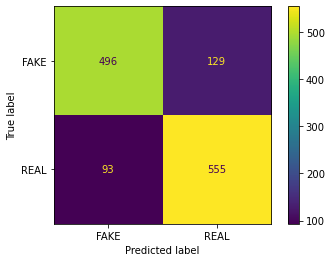

In [54]:
plot_confusion_matrix(model, tfid_x_test,y_test)
plt.show()

In [55]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

        FAKE       0.84      0.79      0.82       625
        REAL       0.81      0.86      0.83       648

    accuracy                           0.83      1273
   macro avg       0.83      0.83      0.83      1273
weighted avg       0.83      0.83      0.83      1273



In [56]:
model.feature_importances_

array([0.        , 0.00223963, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [57]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = model.predict(vectorized_input_data)
    print(prediction)

In [58]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [59]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [60]:
dataframe.tail()

,Unnamed: 0,title,text,label
6358,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6359,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6360,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6361,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6362,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL


In [61]:
fake_news_det("Hi there! I am Gowrav, you might also know me ...")

['REAL']


# Get_dummies()

In [62]:
datframe = pd.get_dummies(dataframe)
dataframe

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6358,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6359,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6360,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL
6361,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL


# OneHotEncoding

In [63]:
df = pd.read_csv('news.csv')

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first')

enc_df = pd.DataFrame(enc.fit_transform(dataframe[['label']]).toarray())

In [64]:
df_ohe = pd.concat([df,enc_df], axis='columns')

df_ohe.drop('label', axis='columns')

df_ohe

,Unnamed: 0,title,text,label,0
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1.0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1.0
...,...,...,...,...,...
6358,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL,1.0
6359,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL,1.0
6360,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL,1.0
6361,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",REAL,1.0


# LabelEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder 

le =LabelEncoder()

df['label'] = le.fit_transform(df["label"])

df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6358,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",1
6359,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",1
6360,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",1
6361,4330,Gowrav Self intro,"Hi there! I am Gowrav, you might also know me ...",1


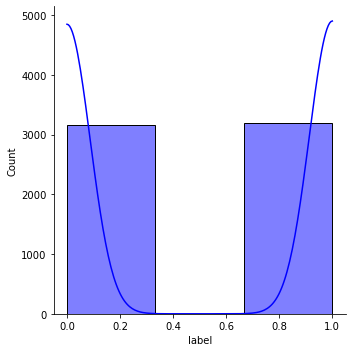

In [66]:
sns.displot(df['label'], bins=3, kde=True, color='blue')
plt.show()

In [67]:
df.value_counts('label')

label
1    3199
0    3164
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

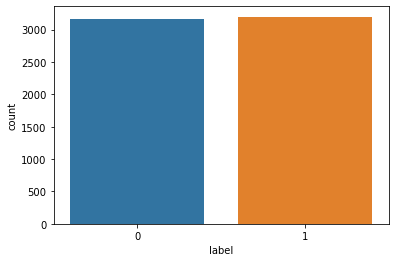

In [68]:
sns.countplot(data=df, x='label')

<AxesSubplot:>

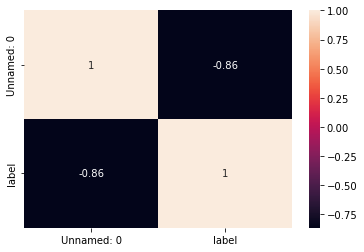

In [69]:
sns.heatmap(df.corr(),annot=True)

## Knn Classification

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn_model = KNeighborsClassifier()

In [72]:
knn_model.fit(tfid_x_train, y_train)

KNeighborsClassifier()

In [73]:
y_pred = knn_model.predict(tfid_x_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5624509033778476